# Titanic Project
Udacity  
Data Science Nano Degree  
Project 2  
Philipp Vogler  
October 2016  

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploration

In [2]:
# Data import
path = r'/Users/philipp/Desktop/DS/Projects/Titanic/titanic-data.csv'

dataFrame = pd.read_csv(path)
dataFrame

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)


In [3]:
# Despriptive statistics
dataFrame.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1144cd190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117d25410>]], dtype=object)

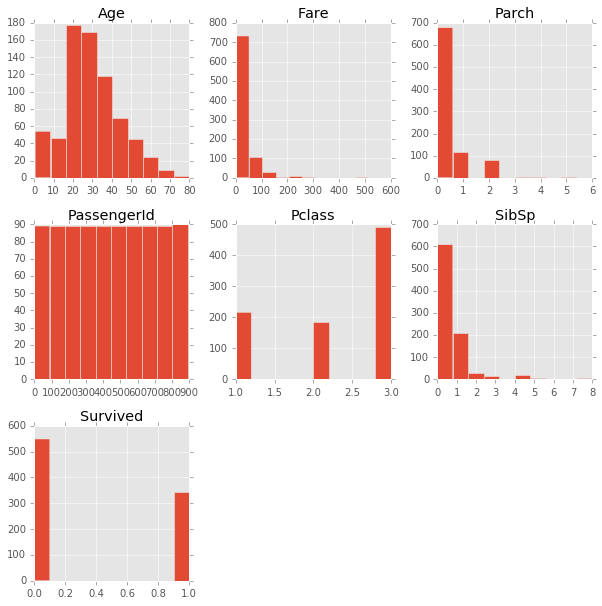

In [4]:
# Initial Plot
%pylab inline

plt.style.use('ggplot')

dataFrame.hist(figsize=(10,10))

## Research Question: ML Problem

Predicting the chance to survive from the the rest of the data is a clasification problem with lables. With less than 100k samples sci-kit learn suggests a support vector classifier with linear kernel. So that is what I am going to try. For simplicity I select only features which are numerice already.

## Data wrangling

In [5]:
# Data Pre-Processing

feature_cols = dataFrame.drop(['PassengerId', 'Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis = 1) # features columns
target_col = dataFrame.iloc[:,1] # target/label column 

print "Feature column(s):-\n{}".format(feature_cols)
print "Target column: {}".format(target_col)

# Imputation of missing values
from sklearn.preprocessing import Imputer

# Training Test Set
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_cols, target_col) # test size is set to 0.25

print "Training set: {} samples".format(x_train.shape[0])
print "Test set: {} samples".format(x_test.shape[0])

Feature column(s):-
     Pclass  SibSp  Parch      Fare
0         3      1      0    7.2500
1         1      1      0   71.2833
2         3      0      0    7.9250
3         1      1      0   53.1000
4         3      0      0    8.0500
5         3      0      0    8.4583
6         1      0      0   51.8625
7         3      3      1   21.0750
8         3      0      2   11.1333
9         2      1      0   30.0708
10        3      1      1   16.7000
11        1      0      0   26.5500
12        3      0      0    8.0500
13        3      1      5   31.2750
14        3      0      0    7.8542
15        2      0      0   16.0000
16        3      4      1   29.1250
17        2      0      0   13.0000
18        3      1      0   18.0000
19        3      0      0    7.2250
20        2      0      0   26.0000
21        2      0      0   13.0000
22        3      0      0    8.0292
23        1      0      0   35.5000
24        3      3      1   21.0750
25        3      1      5   31.3875
26      

## Training the Classifier

In [9]:
# Classifier
from sklearn.svm import LinearSVC #sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
from sklearn.grid_search import GridSearchCV

# Set the parameters by cross-validation with linear SVC
tuned_parameters = [{'C': [0.0001, 0.001, 0.01, 0.1, 1]}]

# CV with grid search of C
clf = GridSearchCV(LinearSVC (C = 1, random_state = 123), param_grid = tuned_parameters, cv = 5) # 5-fold CV

# Fit
clf.fit(x_train, y_train)

print clf  
print ('\n' "Best parameter from grid search: " + str(clf.best_params_) +'\n')

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Best parameter from grid search: {'C': 0.001}



## Validation

In [10]:
# Predict
y_pred = clf.predict(x_test)

# Validation
from sklearn.metrics import classification_report

c_report = classification_report(y_test, y_pred)
print "\n Classification report: \n {}".format(c_report)



 Classification report: 
              precision    recall  f1-score   support

          0       0.61      0.96      0.75       123
          1       0.84      0.26      0.40       100

avg / total       0.72      0.65      0.59       223



These scores are not overwhelming. But for a simple prediction model that utilizes only about half of the available data, it is not that bad.

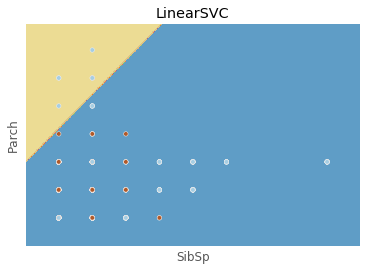

In [35]:
# Plotting one decision boundary of the Minear SVC

import matplotlib.pyplot as plt

X = feature_cols.values[:, 1:3]
y = target_col

h = 0.02  # step size in the mesh

clf = svm.LinearSVC(C=0.001).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('SibSp')
plt.ylabel('Parch')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('LinearSVC')

plt.show()

The decision boundary for the features "Parch" and "SibSp" shows that the linear kernel of the classifier might not be the best fit. Feature engineering might help also.

## Sources

- [Kaggle](https://www.kaggle.com/c/titanic/data)
- [Pandas Documentation](http://pandas.pydata.org/pandas-docs)
- [Matplotlib Documentation](http://matplotlib.org/examples/statistics/boxplot_demo.html)
- [sci-kit learn:  Classification](http://scikit-learn.org/stable/modules/svm.html#classification)
- [MLE Nanao Dergee Project 0](https://classroom.udacity.com/nanodegrees/nd009/parts/0091345401/project)
- [sci-kit learn:Plot different SVM classifiers in the iris dataset](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html)